In [1]:
import os
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
from poly_features import poly_features
from normalizacao import normalizar_caracteristica
from linearRegCostFunction import RegCost, gdReg, minimize
from learningCurve import learningCurve

In [2]:
#ler arquivo de dados
data = spio.loadmat('data/ex5data1.mat')
#armazena os dados de cada array identificado em [''] na sua respectiva variável a ser usada
X = data['X']
y = data ['y']
Xval = data['Xval']
yval = data['yval']

In [3]:
X_poly = poly_features(X, 8)
X_poly.shape

(12, 8)

In [4]:
X_norm, y_norm = normalizar_caracteristica(X_poly, y)
theta0 = np.zeros((X_norm.shape[1],1))
custo, theta = minimize(theta0, X_norm, y_norm, 0)

In [5]:
#def plot(X, y, xx1, h, theta):
#    t = np.arange(-80, 80, 14)
#    plt.axis ([-80, 80, -60, 40])
#    plt.scatter(X.T, y, color='red', marker='x')
#    plt.plot(t, h, color = 'blue')
#    plt.xlabel('Change in water level (x)')
#    plt.ylabel('Water flowing out of the dam (y)')
#    plt.title('Learning Curve for Linear Regression')
    #define o nome do arquivo que guardará a imagem do gráfico, e cria o caminho, caso não exista
#    filename = 'target/plot7.1.png'
#    if not os.path.exists(os.path.dirname(filename)):
#      os.makedirs(os.path.dirname(filename))

    #salva imagem do gráfico e o exibe
#    plt.savefig(filename)
#    plt.show()

In [13]:
def ploterro(erro_val, erro):
    t = np.arange(1,13)
    plt.axis ([0, 13, 0, 100])
    plt.plot (t, erro_val,color = 'green', label = 'Cross Validation')
    plt.plot (t, erro, color = "blue", label = 'Train')
    plt.legend()
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.title('Learning Curve for Linear Regression')
    #define o nome do arquivo que guardará a imagem do gráfico, e cria o caminho, caso não exista
    filename = 'target/plot7.2.png'
    if not os.path.exists(os.path.dirname(filename)):
      os.makedirs(os.path.dirname(filename))

    #salva imagem do gráfico e o exibe
    plt.savefig(filename)
    plt.show()

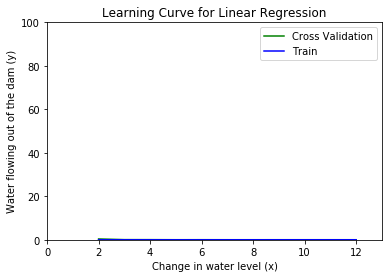

In [14]:
Xval_poly = poly_features(Xval, 8)
Xval_norm, yval_norm = normalizar_caracteristica(Xval_poly, yval)
erro, erro_val = learningCurve(X_norm, y_norm, Xval_norm, yval_norm, 0)
ploterro(erro_val, erro)